# Building a model in TensorFlow

### Step 1: Import the data

from tensorflow.examples.tutorials.mnist import input_data

### Step 2: Read the data into object

mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

### Step 3: Initialize the data

x_train, y_train = mnist.train.next_batch(10)

### Step 4: Intialize the tensors

x = tf.placeholder(float64, size of x_train)

y = tf.placeholder(float64, size of y_train)

weights = tf.Variable(np.zeros([size]))

biases = tf.Variable(np.zeros([size]))

y_predicted = tf.nn.softmax(tf.sum(tf.matmul(w,x),b))

### Step 5: Now define the cost function

cost_function = tf.nn.softmax_cross_entropy_with_logits(y_predicted, y)

### Step 6: Reduce the cost function

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

### Step 7: Train the model

sess = tf.Session()

tf.global_variable_initializer().run()

predicted = sess.run(optimizer, feed_dict = { x : x_train, y: y_train })

### Step 8: Finding the accuracy

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

D:\Installers\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Input the data

In [2]:
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

# Initialize the train data and test data

In [5]:
x_data,y_data = mnist.train.next_batch(1)
x_testing_data = x_data

In [6]:
x_testing_data.shape

(1, 784)

# Sample of data

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


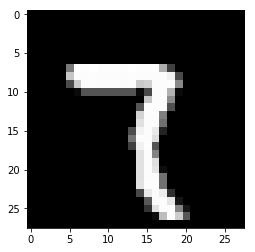

In [7]:
x_testing_data = x_testing_data.reshape([28,28])
plt.gray()
plt.imshow(x_testing_data)
print(y_data)

In [8]:
x_data.shape

(1, 784)

In [9]:
y_data.shape

(1, 10)

# TensorFlow usage to define training data (x_input) , Weights, Biases values  

# and predicted output (y_output) and original Output (y_test) 

In [10]:
import tensorflow as tf

x_input = tf.placeholder(tf.float64, [None,784])
weights = tf.Variable(np.zeros([784,10]))
biases = tf.Variable(np.zeros([10]))

In [11]:
y_test = tf.placeholder(tf.float64, [None,10])

In [12]:
y_output = tf.nn.softmax(tf.matmul(x_input,weights)+biases)

# Defining cost function and using Gradient Descent

In [13]:
cost_function = tf.nn.softmax_cross_entropy_with_logits(logits = y_output, labels = y_test)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [14]:
reduction_cost_function = tf.train.GradientDescentOptimizer(0.5).minimize(cost_function)

# Creating a session and declaring a initializing global variables

In [15]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# Predicting the y_output

In [24]:
for _ in range(1000):
    x_data, y_data = mnist.train.next_batch(10)
    sess.run(reduction_cost_function, feed_dict = {x_input:x_data, y_test:y_data})

# Comparing the predicted output and original output

In [25]:
correct_prediction = tf.equal(tf.argmax(y_output,1), tf.argmax(y_test,1))

# Defining accuracy

In [26]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [27]:
print(sess.run(accuracy, feed_dict = {x_input : mnist.test.images , y_test : mnist.test.labels}))

0.2868


# Automatic Differentiation

TensorFlow will preform differentiation automatically. It uses a chain rule of differentitation. Consider,

d(cos x)/dx = -sin x